# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA"

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/GENoVA


/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset_np # type: ignore
from GMetrics.utils import se_mean, se_std
from GMetrics.metrics.NPLM import candidate_sigma

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2025-10-22 10:05:18.496842: Importing os...
2025-10-22 10:05:18.497169: Importing sys...
Visible devices: [0]
2025-10-22 10:05:18.497420: Importing timer from timeit...
2025-10-22 10:05:18.497490: Setting env variables for tf import (only device(s) [0] will be available)...
2025-10-22 10:05:18.497627: Importing numpy...
2025-10-22 10:05:18.657652: Importing matplotlib...
2025-10-22 10:05:19.061897: Importing h5py...
2025-10-22 10:05:19.101085: Importing importlib.util...
2025-10-22 10:05:19.101194: Importing json...
2025-10-22 10:05:19.101255: Importing pandas...
2025-10-22 10:05:19.620425: Importing random...
2025-10-22 10:05:19.620576: Importing scipy utils...
2025-10-22 10:05:20.184666: Importing subprocess...
2025-10-22 10:05:20.184857: Importing textwrap...
2025-10-22 10:05:20.184925: Importing tensorflow...
Tensorflow version: 2.16.1
2025-10-22 10:05:24.252701: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2025-10-22 10:05:25.598792: Importing timeit.

/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2025-10-22 10:05:31.028521: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2025-10-22 10:05:31.058636: All done.


# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


## Init data

In [6]:
results_dir = "results/particle_features_30/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories were created")
else:
    print("Directory alredy exists")

Directory alredy exists


In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_particle_features(particle_features):
    tmp = particle_features[:, :, :3]
    shape = tmp.shape
    particle_features_reshaped = tf.reshape(tmp, [-1, shape[1] * shape[2]])
    return particle_features_reshaped

particle_features_reduced = get_reduced_particle_features(particle_features)
particle_features_reduced.shape

TensorShape([177252, 90])

# TwoSample Test

In [8]:
tests_dir = os.path.join(results_dir, "tests/")
model_dir = os.path.join(tests_dir, '50K_preprocessed/')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory {model_dir} has been created")
else:
    print(f"Directory {model_dir} already exists")

particle_features_reduced = get_reduced_particle_features(particle_features)

mean = tf.reduce_mean(particle_features_reduced, axis=0)
std = tf.math.reduce_std(particle_features_reduced, axis=0)
    
dataset = preprocess_data(particle_features_reduced, mean, std)

Directory results/particle_features_30/tests/50K_preprocessed/ already exists


## Bootstrapping Null Hypothesis

In [9]:
m_value = 20000
lam_value = 1e-7

In [10]:
null_hypotheses_dir = os.path.join(model_dir, 'null_hypotheses/')
if not os.path.exists(null_hypotheses_dir):
    os.makedirs(null_hypotheses_dir)
    print(f"Directory {null_hypotheses_dir} has been created")
else:
    print(f"Directory {null_hypotheses_dir} already exists")    
    
metrics_config_file = os.path.join(model_dir, "metrics_config.json")

# null_hypotheses_dir = model_dir + f"null_hypothesis_M_{m_value}_lam_{lam_value}/"
# if os.path.exists(null_hypotheses_dir):
#     print("Null hypothesis directory exists")
# else:
#     os.makedirs(null_hypotheses_dir)
#     print("Null hypothesis directory was created")
# metrics_config_file = model_dir + f"metrics_config_M_{m_value}_lam_{lam_value}.json"

Directory results/particle_features_30/tests/50K_preprocessed/null_hypotheses/ already exists


In [11]:
niter_tot = 1_000
batch_size_test = 50_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)

niter: 1, nbootstrap: 1000


Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.


In [12]:
flk_sigma = candidate_sigma(dist_1_null, perc = 90)  

Finite Dataset Case.
The Gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference data. 
The value of sigma is: 18.2


In [13]:
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)
NPLMMetric = GMetrics.NPLMMetric(TwoSampleTestInputsNull,
                                 progress_bar = True,
                                 verbose = True,
                                 M = m_value, 
                                 lam = lam_value, 
                                 iter_list = 1000000,
                                 flk_sigma = flk_sigma,
                                 weight = 1) 

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [14]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputsNull.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,is_symb_1,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample
0,1,50000,1000,10000000,float64,0,True,False,None,True,False,90,50000,False,90,50000,float64,90,50000,True


In [15]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200, # optimized for 5D
                                       "latex": "t_{\mathrm{FGD}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False,
                                                  "verbose": True}, 
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 8, # optimized for 5D
                                       "latex": "t_{\mathrm{MMD}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {"verbose": True}, 
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 3200,
                                       "latex": "t_{\overline{\mathrm{KS}}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "t_{\mathrm{SKS}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0,
                                                  "verbose": True}, 
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "t_{\mathrm{SW}}",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")},
                                "NPLM": {"name": "nplm",
                                       "object_name": "NPLMMetric",
                                       "class_name": "GMetrics.NPLMMetric",
                                       "kwargs": {"M": m_value,
                                                  "lam": lam_value,
                                                  "iter_list": 1000000,
                                                  "flk_sigma": flk_sigma,
                                                  "weight" : 1},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "t_{\mathrm{NPLM}}",
                                       "null_file": null_hypotheses_dir+f"NPLM_M_{m_value}_lam_{lam_value}.json"}}}

print(metrics_config[unique_key])
nplm_config = metrics_config[unique_key]["NPLM"]
print(nplm_config)
print(metrics_config[unique_key]["NPLM"]["object_name"])

{'fgd': {'name': 'fgd', 'object_name': 'FGDMetricNull', 'class_name': 'GMetrics.FGDMetric', 'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False, 'verbose': True}, 'result_key': 'metric_list', 'scale_func': <function <lambda> at 0x7f1399b21260>, 'scale_func_string': 'lambda ns, ndims: 1', 'test_config': {'niter': 1, 'batch_size_test': 50000, 'batch_size_gen': 1000, 'small_sample_threshold': 10000000, 'dtype_input': 'float64', 'seed': 0, 'use_tf': True, 'mirror_strategy': False, 'strategy': None, 'verbose': True, 'is_symb_1': False, 'ndims_1': 90, 'nsamples_1': 50000, 'is_symb_2': False, 'ndims_2': 90, 'nsamples_2': 50000, 'dtype': 'float64', 'ndims': 90, 'nsamples': 50000, 'small_sample': True}, 'max_vectorize': 3200, 'latex': 't_{\\mathrm{FGD}}', 'null_file': 'results/particle_features_30/tests/50K_preprocessed/null_hypotheses/FGD.json'}, 'mmd': {'name': 'mmd', 'object_name': 'MMDMetricNull', 'class_name': 'GMetrics.MMDMetric', 'kwargs': {'degree': 4, 'block_size': 10000

In [16]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
            del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/particle_features_30/tests/50K_preprocessed/null_hypotheses/FGD.json
Loading mmd from results/particle_features_30/tests/50K_preprocessed/null_hypotheses/MMD.json
Loading ks from results/particle_features_30/tests/50K_preprocessed/null_hypotheses/KS.json
Loading sks from results/particle_features_30/tests/50K_preprocessed/null_hypotheses/SKS.json
Loading swd from results/particle_features_30/tests/50K_preprocessed/null_hypotheses/SWD.json
Loading nplm from results/particle_features_30/tests/50K_preprocessed/null_hypotheses/NPLM_M_20000_lam_1e-07.json


In [17]:
cl_list = [0.68, 0.95, 0.99]
null_times = []
ndims = 4

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [680, 319], 0.0012586948801137365], [0.95, [950, 50], 0.006077035638210011], [0.99, [990, 10], 0.009529601318872118]]
Computing time for metric fgd: 6780.727251373697
ThresholdS for metric mmd: [[0.68, [680, 319], 5.747240247550023e-05], [0.95, [950, 50], 0.0004222552124545087], [0.99, [990, 10], 0.0007585287111538108]]
Computing time for metric mmd: 3695.371096007526
ThresholdS for metric ks: [[0.68, [680, 319], 0.9068361006638652], [0.95, [950, 50], 1.0390897162981996], [0.99, [990, 10], 1.1847306727185003]]
Computing time for metric ks: 1401.6361789442599
ThresholdS for metric sks: [[0.68, [680, 319], 0.8879680700597168], [0.95, [950, 50], 1.0163880760941653], [0.99, [990, 10], 1.1190045834660103]]
Computing time for metric sks: 3878.207828369923
ThresholdS for metric swd: [[0.68, [680, 319], 0.6645887104148074], [0.95, [950, 50], 0.7895319075595144], [0.99, [990, 10], 0.889721107308779]]
Computing time for metric swd: 140.7906902367249
ThresholdS 

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fgd,FGDMetricNull,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7f1399b21260>,"lambda ns, ndims: 1","{'niter': 1, 'batch_size_test': 50000, 'batch_...",3200,t_{\mathrm{FGD}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 0.0012586948801137365], [0..."
1,mmd,MMDMetricNull,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7f150c714b80>,"lambda ns, ndims: 1","{'niter': 1, 'batch_size_test': 50000, 'batch_...",8,t_{\mathrm{MMD}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 5.747240247550023e-05], [0..."
2,ks,KSTestNull,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7f150c714a40>,"lambda ns, _: np.sqrt(ns)","{'niter': 1, 'batch_size_test': 50000, 'batch_...",3200,t_{\overline{\mathrm{KS}}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 0.9068361006638652], [0.95..."
3,sks,SKSTestNull,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f150c714ae0>,"lambda ns, _: np.sqrt(ns)","{'niter': 1, 'batch_size_test': 50000, 'batch_...",100,t_{\mathrm{SKS}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 0.8879680700597168], [0.95..."
4,swd,SWDMetricNull,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f150c714c20>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 1, 'batch_size_test': 50000, 'batch_...",100,t_{\mathrm{SW}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 0.6645887104148074], [0.95..."
5,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 20000, 'lam': 1e-07, 'iter_list': 100000...",metric_list,<function <lambda> at 0x7f150c714cc0>,"lambda ns, ndims: 1","{'niter': 1, 'batch_size_test': 50000, 'batch_...",1000,t_{\mathrm{NPLM}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 10847.264557430304], [0.95..."


### Plots of null-distributions

mu = 0.001328186172835995 +/- 1.581301238782224e-07
sigma = 0.0022361828148426527 +/- 0.00010065437301011702
68%CL = 0.0012586948801137365, 95%CL = 0.006077035638210011, 99%CL = 0.009529601318872118
mu = 0.001328186172835995 +/- 1.581301238782224e-07
sigma = 0.0022361828148426527 +/- 0.00010065437301011702


/tmp/ipykernel_941691/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_941691/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_941691/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


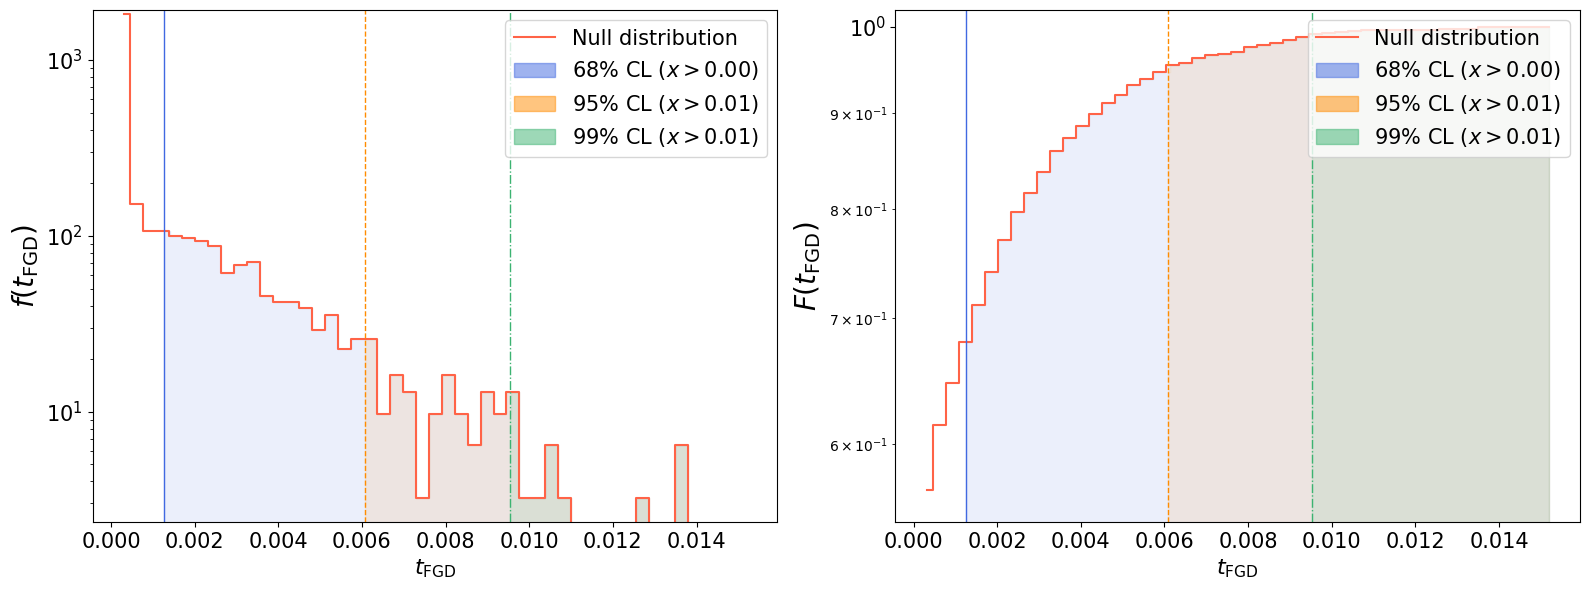

Time elapsed: 1.1184544749557972 seconds.
mu = -3.7284195853284073e-06 +/- 1.6098846354805583e-09
sigma = 0.000225630277627549 +/- 7.981040191293575e-06
68%CL = 5.747240247550023e-05, 95%CL = 0.0004222552124545087, 99%CL = 0.0007585287111538108
mu = -3.7284195853284073e-06 +/- 1.6098846354805583e-09
sigma = 0.000225630277627549 +/- 7.981040191293575e-06


/tmp/ipykernel_941691/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_941691/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_941691/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_941691/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


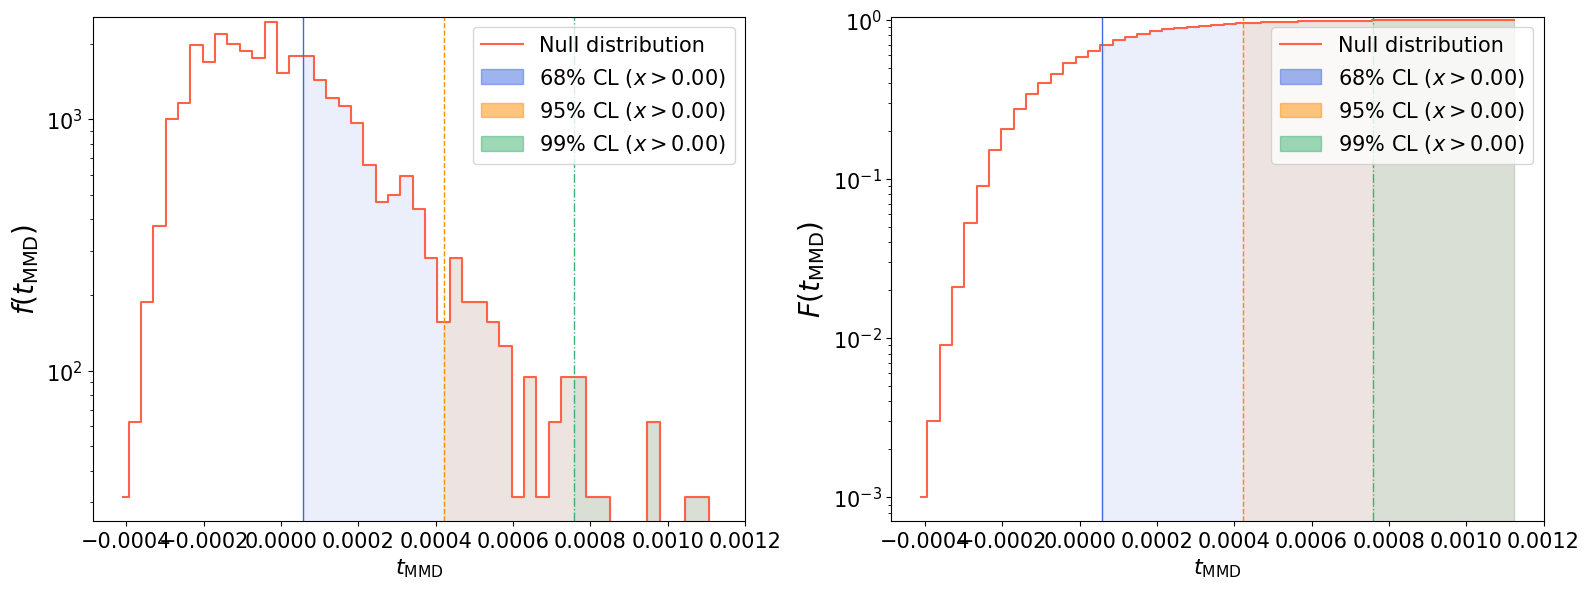

Time elapsed: 1.026449833996594 seconds.
mu = 0.8684938066517661 +/- 0.00031398258901855635
sigma = 0.09964437399749222 +/- 0.002556092144705397
68%CL = 0.9068361006638652, 95%CL = 1.0390897162981996, 99%CL = 1.1847306727185003
mu = 0.8684938066517661 +/- 0.00031398258901855635
sigma = 0.09964437399749222 +/- 0.002556092144705397


/tmp/ipykernel_941691/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_941691/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_941691/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_941691/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


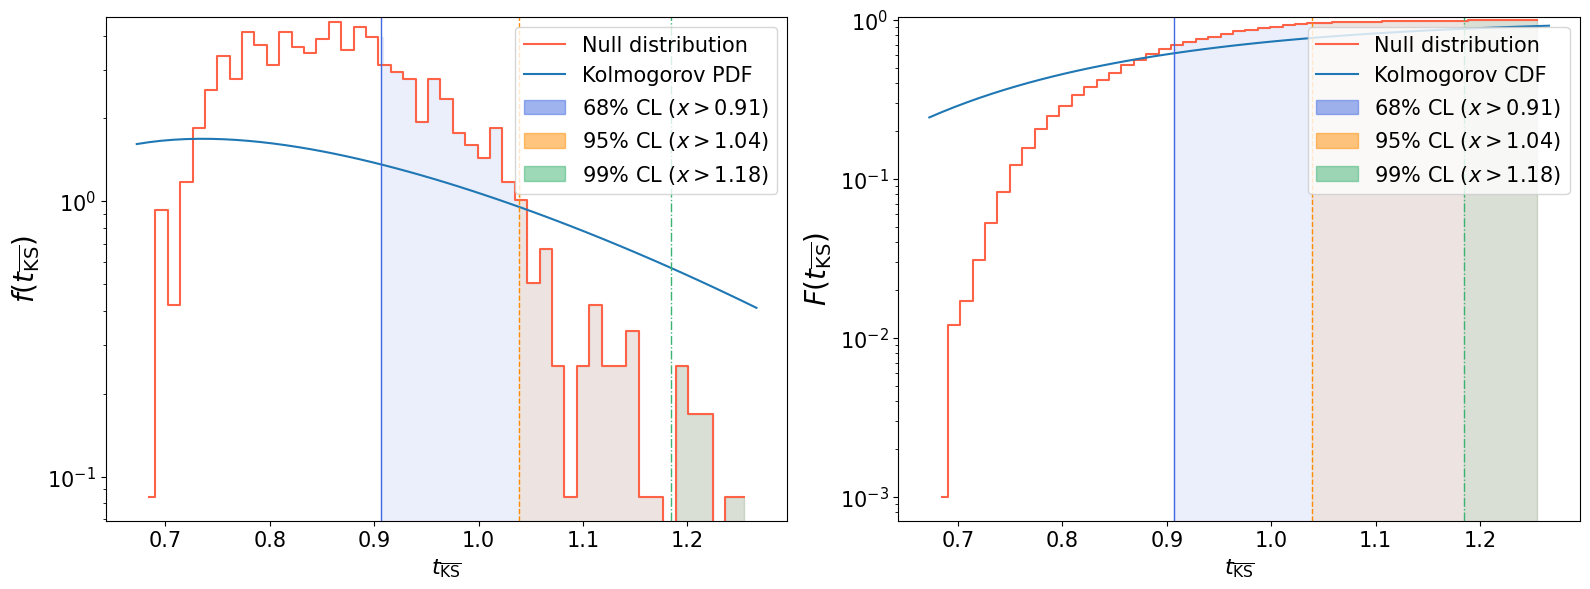

Time elapsed: 1.0770519119687378 seconds.
mu = 0.8649226097096241 +/- 0.00018643333681446196
sigma = 0.0767824183077754 +/- 0.0024657142813275
68%CL = 0.8879680700597168, 95%CL = 1.0163880760941653, 99%CL = 1.1190045834660103
mu = 0.8649226097096241 +/- 0.00018643333681446196
sigma = 0.0767824183077754 +/- 0.0024657142813275


/tmp/ipykernel_941691/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_941691/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_941691/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_941691/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


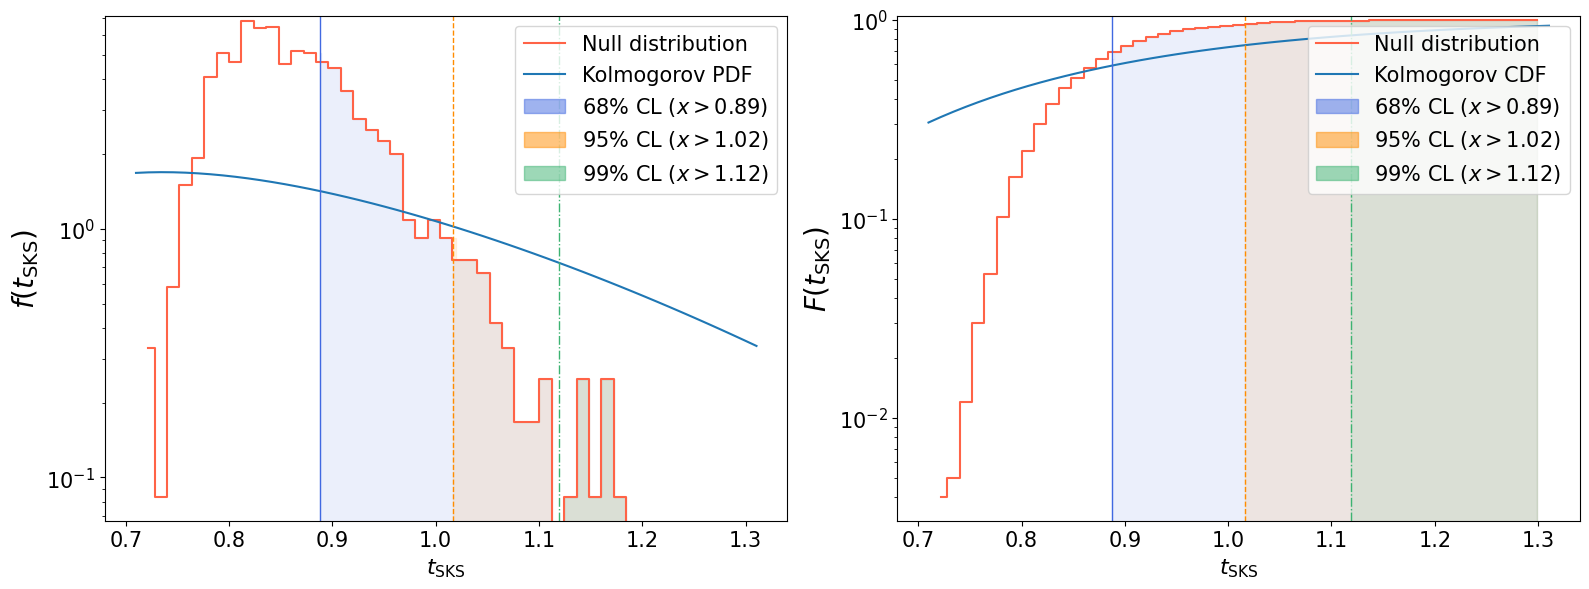

Time elapsed: 1.0470460560172796 seconds.
mu = 0.6459963788613704 +/- 0.00018057885351066685
sigma = 0.07556722003326576 +/- 0.002754698599561772
68%CL = 0.6645887104148074, 95%CL = 0.7895319075595144, 99%CL = 0.889721107308779
mu = 0.6459963788613704 +/- 0.00018057885351066685
sigma = 0.07556722003326576 +/- 0.002754698599561772


/tmp/ipykernel_941691/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_941691/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_941691/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_941691/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


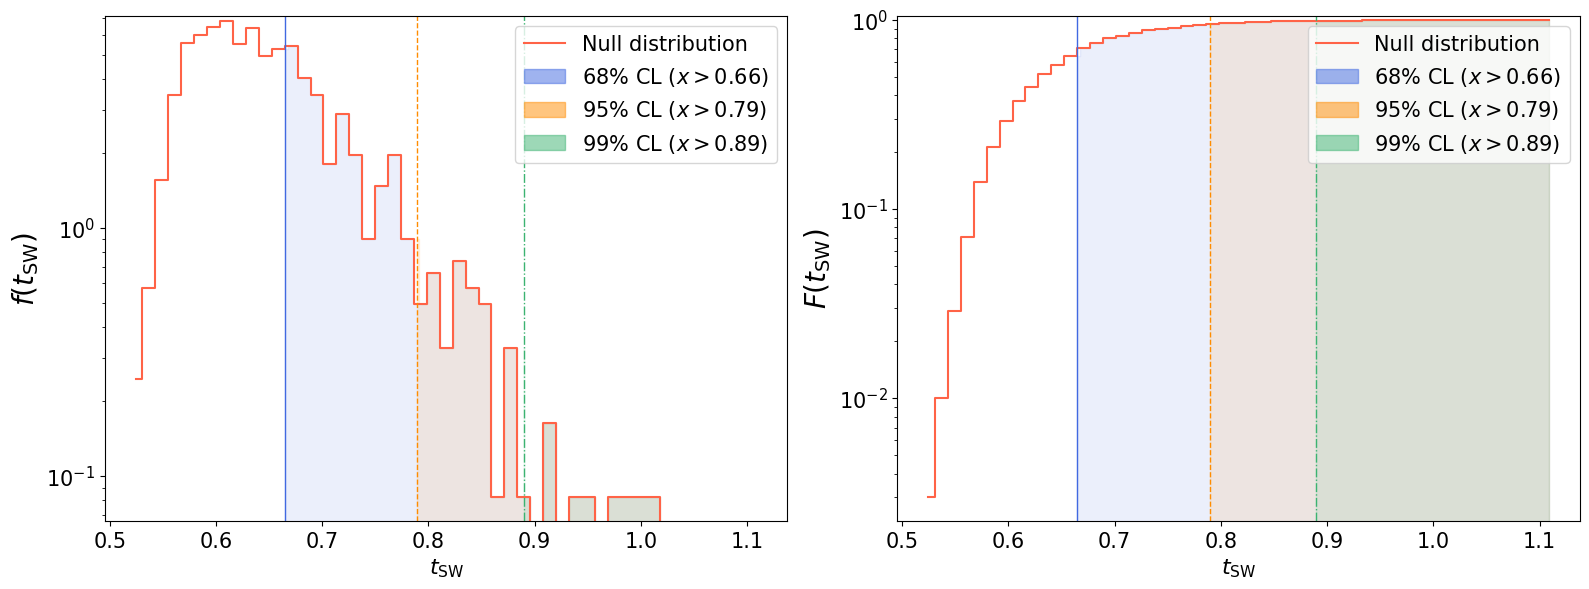

Time elapsed: 0.7092341822572052 seconds.
mu = 10775.953603805809 +/- 766.8877859405333
sigma = 155.72771472463526 +/- 3.646216877922077
68%CL = 10847.264557430304, 95%CL = 11025.409973381553, 99%CL = 11126.691963799072
mu = 10775.953603805809 +/- 766.8877859405333
sigma = 155.72771472463526 +/- 3.646216877922077


/tmp/ipykernel_941691/4116821647.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_941691/4116821647.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_941691/4116821647.py:111: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_941691/4116821647.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


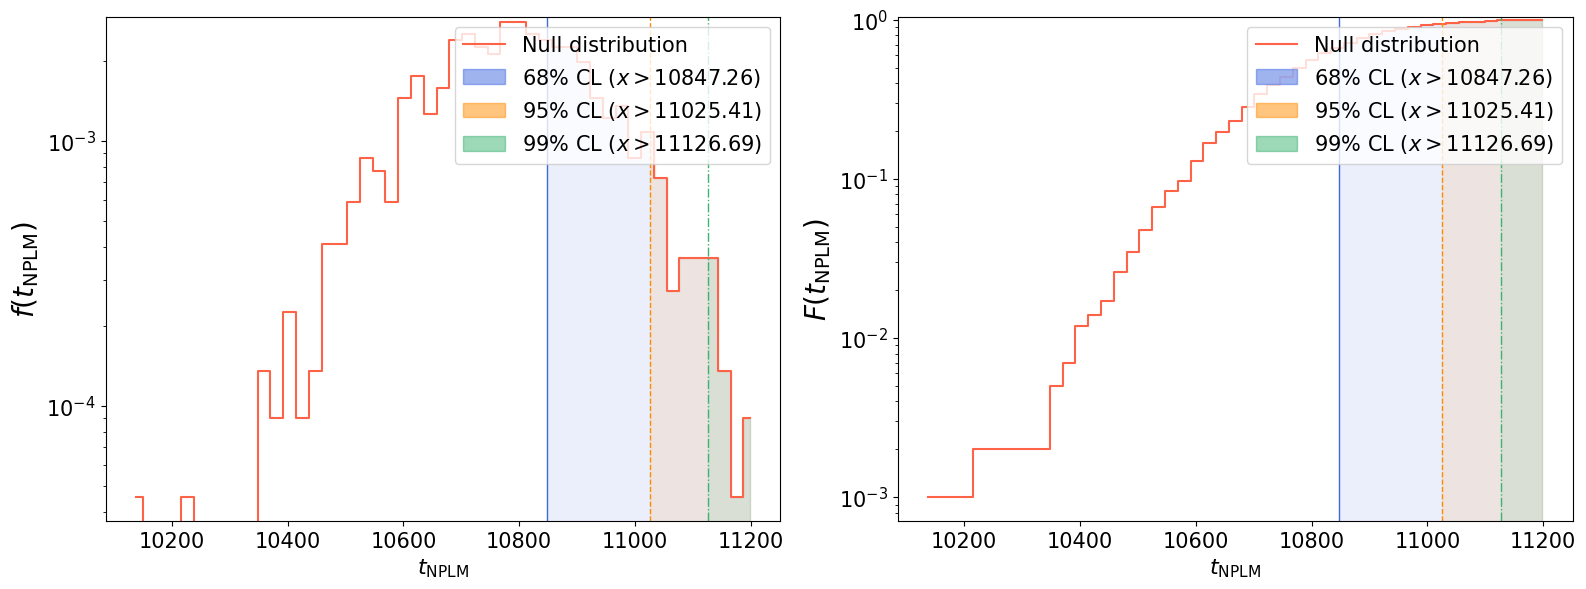

Time elapsed: 0.7568166670389473 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fgd,FGDMetricNull,GMetrics.FGDMetric,"{'num_batches': 20, 'num_points': 10, 'normali...",metric_list,<function <lambda> at 0x7f1399b21260>,"lambda ns, ndims: 1","{'niter': 1, 'batch_size_test': 50000, 'batch_...",3200,t_{\mathrm{FGD}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 0.0012586948801137365], [0...",results/particle_features_30/tests/50K_preproc...
1,mmd,MMDMetricNull,GMetrics.MMDMetric,"{'degree': 4, 'block_size': 10000, 'normalise'...",metric_list,<function <lambda> at 0x7f150c714b80>,"lambda ns, ndims: 1","{'niter': 1, 'batch_size_test': 50000, 'batch_...",8,t_{\mathrm{MMD}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 5.747240247550023e-05], [0...",results/particle_features_30/tests/50K_preproc...
2,ks,KSTestNull,GMetrics.KSTest,{'verbose': True},statistic_means,<function <lambda> at 0x7f150c714a40>,"lambda ns, _: np.sqrt(ns)","{'niter': 1, 'batch_size_test': 50000, 'batch_...",3200,t_{\overline{\mathrm{KS}}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 0.9068361006638652], [0.95...",results/particle_features_30/tests/50K_preproc...
3,sks,SKSTestNull,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f150c714ae0>,"lambda ns, _: np.sqrt(ns)","{'niter': 1, 'batch_size_test': 50000, 'batch_...",100,t_{\mathrm{SKS}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 0.8879680700597168], [0.95...",results/particle_features_30/tests/50K_preproc...
4,swd,SWDMetricNull,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0, 'verbose':...",metric_means,<function <lambda> at 0x7f150c714c20>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 1, 'batch_size_test': 50000, 'batch_...",100,t_{\mathrm{SW}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 0.6645887104148074], [0.95...",results/particle_features_30/tests/50K_preproc...
5,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 20000, 'lam': 1e-07, 'iter_list': 100000...",metric_list,<function <lambda> at 0x7f150c714cc0>,"lambda ns, ndims: 1","{'niter': 1, 'batch_size_test': 50000, 'batch_...",1000,t_{\mathrm{NPLM}},results/particle_features_30/tests/50K_preproc...,"[[0.68, [680, 319], 10847.264557430304], [0.95...",results/particle_features_30/tests/50K_preproc...


In [18]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"$%s$" % latex, fontsize=16)
    ax[0].set_ylabel(r"$f(%s)$" % latex, fontsize=20)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"$%s$"%latex, fontsize=16)
    ax[1].set_ylabel(r"$F(%s)$" % latex, fontsize=20)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypothesis

### Scan and exclusion limits (bisection method)

In [19]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100, # this will be adapted to the boostrap size
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [20]:
# file_path = os.path.join(model_dir, "exclusion_limits.json")
# if os.path.exists(file_path):
#     try:
#         with open(file_path, "r") as file:
#             existing_data = json.load(file)
#     except json.JSONDecodeError:
#         existing_data = {}
# else:
#     existing_data = {}
    
# # Sort the dictionary by keys
# existing_data = dict(sorted(existing_data.items()))

# # Save the sorted dictionary back to a JSON file
# with open(file_path, 'w') as f:
#     json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

file_path = os.path.join(model_dir, f"exclusion_limits_M_{m_value}_lam_{lam_value}.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [21]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for deformation in deformations:
    eps_max = 1  # Default starting value
    for bound in bounds:
        try:
            # Filter results for the current deformation and bound
            result = {
                k: v for k, v in existing_data.items()
                if v["null_config"]["name"] == nplm_config["name"]
                and v["deformation"] == deformation
                and v["bound"] == bound
            }
        except Exception:
            result = {}

        if result:
            print(f"{bound.capitalize()} bounds for {nplm_config['name']} with {deformation} deformation already loaded.")
            # Update eps_max to the last computed epsilon in the exclusion list
            last_result = list(result.values())[0]
            if last_result["exclusion_list"]:
                eps_max = last_result["exclusion_list"][-1][3]  # Last epsilon value
        else:
            print(f"Computing {bound} bounds for {nplm_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection_dataset_np(
                dataset = dataset,
                metric_config=nplm_config,
                test_kwargs=test_kwargs,
                model_dir=model_dir,
                deformation=deformation,
                seed_dist=0,
                x_tol=0.01,
                fn_tol=0.05,
                bound=bound,
                eps_min=0.0,
                eps_max=eps_max,
                smear = 0.,
                max_iterations=50,
                save=True,
                filename=f"exclusion_limits_M_{m_value}_lam_{lam_value}.json",
                verbose=True
            )
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]  # Update eps_max
        global_results.update(result)

print(global_results.keys())

Upper bounds for nplm with mean deformation already loaded.
Central bounds for nplm with mean deformation already loaded.
Lower bounds for nplm with mean deformation already loaded.
Upper bounds for nplm with cov_diag deformation already loaded.
Central bounds for nplm with cov_diag deformation already loaded.
Lower bounds for nplm with cov_diag deformation already loaded.
Upper bounds for nplm with cov_off_diag deformation already loaded.
Central bounds for nplm with cov_off_diag deformation already loaded.
Lower bounds for nplm with cov_off_diag deformation already loaded.
Upper bounds for nplm with power_abs_up deformation already loaded.
Central bounds for nplm with power_abs_up deformation already loaded.
Lower bounds for nplm with power_abs_up deformation already loaded.
Upper bounds for nplm with power_abs_down deformation already loaded.
Central bounds for nplm with power_abs_down deformation already loaded.
Lower bounds for nplm with power_abs_down deformation already loaded.


## Show and save results

In [22]:
import notebooks.shared as shared

In [23]:
results_df, times_df = shared.generate_result_dataframe_nplm(global_results, null_times)

Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm


In [24]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
2,NaN,$0.00167_{-0.0007}^{+0.00053}$,$0.002_{-0.00051}^{+0.0004}$,$121700$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
0,NaN,$0.00349_{-0.0016}^{+0.0013}$,$0.00429_{-0.0012}^{+0.00099}$,$120179$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,NaN,$0.00326_{-0.0015}^{+0.0014}$,$0.00404_{-0.0011}^{+0.0014}$,$117906$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
4,NaN,$0.01074_{-0.0061}^{+0.0053}$,$0.01474_{-0.005}^{+0.005}$,$116436$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
3,NaN,$0.05573_{-0.0076}^{+0.0051}$,$0.05897_{-0.0053}^{+0.0062}$,$86377$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,NaN,$0.04549_{-0.012}^{+0.0075}$,$0.05088_{-0.0085}^{+0.0065}$,$91294$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,NaN,$0.07922_{-0.021}^{+0.015}$,$0.08772_{-0.015}^{+0.01}$,$88713$


### Latex

In [25]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex_nplm(results_df, times_df, title = "{\\bf Scaled Particle features with $\\mathbf{n=m=5\cdot 10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Particle features with $\mathbf{n=m=5\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00167_{-0.0007}^{+0.00053}$ & $0.002_{-0.00051}^{+0.0004}$ & $121700$ & $0.00349_{-0.0016}^{+0.0013}$ & $0.00429_{-0.0012}^{+0.00099}$ & $120179$ \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation} & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00326_{-0.0015}^{+0.0014}$ & $0.00404_{-0.0011}^{+0.0014}$ & $117906$ & $0.01

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/notebooks/shared.py:554: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return df.replace(column_replacements)


In [26]:
shared.save_latex_nplm(tex_string, model_dir, f"results_table_M_{m_value}_lam_{lam_value}.tex")

LaTeX table code has been written to results/particle_features_30/tests/50K_preprocessed/results_table_M_20000_lam_1e-07.tex


In [27]:
import re

# Path to the old metrics results table
file_path_nplm_jetnet_old = "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_JetNetMetrics/results/particle_features_30/tests/50K_preprocessed/results_table_hyper_par.tex"
with open(file_path_nplm_jetnet_old, 'r') as file:
    table_nplm_jetnet_old = file.read()


# Extract rows containing "$t_{\mathrm{NPLM}}$" and add coloring
nplm_rows = []
lines_nplm = tex_string.splitlines()
for line in lines_nplm:
    if "$t_{\mathrm{NPLM}}$" in line:
        nplm_rows.append("\\rowcolor{green!35}"+line)

# Extract rows containing "$t_{\mathrm{NPLM}}$" with red coloring from the old table
nplm_old_rows_red = []
lines_nplm_old_red = table_nplm_jetnet_old.splitlines()
for line in lines_nplm_old_red:
    if "\\rowcolor{red!35}	$t_{\mathrm{NPLM}}$" in line:
        nplm_old_rows_red.append(line)

# Extract rows containing "$t_{\mathrm{NPLM}}$" with red coloring from the old table
nplm_old_rows_blue = []
lines_nplm_old_blue = table_nplm_jetnet_old.splitlines()
for line in lines_nplm_old_blue:
    if "\\rowcolor{blue!35}	$t_{\mathrm{NPLM}}$" in line:
        nplm_old_rows_blue.append(line)

# Extract rows for SW, KS, SKS, FGD, MMD, and LLR metrics
sw_rows = []
lines_sw = table_nplm_jetnet_old.splitlines()
for line in lines_sw:
    if "$t_{\mathrm{SW}}$" in line:
        sw_rows.append(line)

ks_rows = []
lines_ks = table_nplm_jetnet_old.splitlines()
for line in lines_ks:
    if "$t_{\overline{\mathrm{KS}}}$" in line:
        ks_rows.append(line)

sks_rows = []
lines_sks = table_nplm_jetnet_old.splitlines()
for line in lines_sks:
    if "$t_{\mathrm{SKS}}$" in line:
        sks_rows.append(line)

fgd_rows = []
lines_fgd = table_nplm_jetnet_old.splitlines()
for line in lines_fgd:
    if "$t_{\mathrm{FGD}}$" in line:
        fgd_rows.append(line)

mmd_rows = []
lines_mmd = table_nplm_jetnet_old.splitlines()
for line in lines_mmd:
    if "$t_{\mathrm{MMD}}$" in line:
        mmd_rows.append(line)

# Process old lines and construct the updated table
lines_old = table_nplm_jetnet_old.splitlines()
new_lines = []
i = 0  # Index to track row additions

for line in lines_old:
    # Include lines unrelated to metrics
    if (
        "$t_{\\mathrm{SW}}$" not in line
        and "$t_{\\overline{\\mathrm{KS}}}$" not in line
        and "$t_{\\mathrm{SKS}}$" not in line
        and "$t_{\\mathrm{FGD}}$" not in line
        and "$t_{\\mathrm{MMD}}$" not in line
        and "$t_{\\mathrm{LLR}}$" not in line
        and "\\rowcolor{red!35}	$t_{\mathrm{NPLM}}$" not in line
        and "\\rowcolor{blue!35}	$t_{\mathrm{NPLM}}$" not in line
    ):
        new_lines.append(line)
    elif "$t_{\\mathrm{SW}}$" in line:
        # Add SW line and append corresponding rows from other metrics
        new_lines.append(line)
        new_lines.append(ks_rows[i])
        new_lines.append(sks_rows[i])
        new_lines.append(fgd_rows[i])
        new_lines.append(mmd_rows[i])
        new_lines.append(nplm_old_rows_red[i])
        new_lines.append(nplm_old_rows_blue[i])
        new_lines.append(nplm_rows[i])
        i = (i + 1)  # Ensure index doesn't exceed `nplm_rows` length
    else:
        pass

# Combine lines into the updated table
updated_table = "\n".join(new_lines)

# Print the updated table
print(updated_table)



\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf Scaled Particle features with $\mathbf{n=m=5\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm    {CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.01334_{-0.0046}^{+0.0038}$ & $0.01815_{-0.0029}^{+0.0037}$ & ${\mathbf{1116}}$ & $0.0166_{-0.0063}^{+0.0059}$ & $0.02125_{-0.0034}^{+0.006}$ & ${\mathbf{1079}}$ \\
	$t_{\overline{\mathrm{KS}}}$ & ${\mathbf{0.0_{-0}^{+0.0045}}}$ & ${\mathbf{0.00771_{-0.0049}^{+0.0022}}}$ & $58835$ & ${\mathbf{0.0_{-0}^{+0.013}}}$ & $0.01904_{-0.011}^{+0.0086}$ & $62555$ \\
	$t_{\mathrm{SKS}}$ & $0.01275_{-0.0043}^{+0.0034}$ & $0.01734_{-0.0028}^{+0.0036}$ & $18356$ & $0.02131_{-0.0073}^{+0.007}$ & $0.02899_{-0.0047}^{+0.006}$ & $26542$ \\
	$t_{\mathrm{FGD}}$ & $0.016

In [28]:
shared.save_latex_nplm(updated_table, model_dir, f"results_table_3_hyper_par_points.tex")

LaTeX table code has been written to results/particle_features_30/tests/50K_preprocessed/results_table_3_hyper_par_points.tex
